<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,35.369656,0.637032,46.006688,45.289317,0.717372
1,0.0,1.0,41.045801,-0.455689,50.590112,50.969202,-0.379090
2,0.0,2.0,84.050374,-0.201479,93.848895,94.002117,-0.153222
3,0.0,3.0,49.339023,0.442428,59.781452,59.267890,0.513562
4,0.0,4.0,53.515310,-0.494243,63.021067,63.446929,-0.425862
...,...,...,...,...,...,...,...
249995,999.0,245.0,93.449394,-0.065923,103.383471,103.452344,-0.068874
249996,999.0,246.0,64.275255,0.248074,74.523329,74.263119,0.260210
249997,999.0,247.0,86.268964,0.535095,96.804059,96.268202,0.535858
249998,999.0,248.0,53.337516,0.756359,64.093875,63.319724,0.774151


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,35.369656,0.637032,46.006688,45.289317,0.717372
1,0.0,1.0,41.045801,-0.455689,50.590112,50.969202,-0.379090
2,0.0,2.0,84.050374,-0.201479,93.848895,94.002117,-0.153222
3,0.0,3.0,49.339023,0.442428,59.781452,59.267890,0.513562
4,0.0,4.0,53.515310,-0.494243,63.021067,63.446929,-0.425862
...,...,...,...,...,...,...,...
249995,999.0,245.0,93.449394,-0.065923,103.383471,103.452344,-0.068874
249996,999.0,246.0,64.275255,0.248074,74.523329,74.263119,0.260210
249997,999.0,247.0,86.268964,0.535095,96.804059,96.268202,0.535858
249998,999.0,248.0,53.337516,0.756359,64.093875,63.319724,0.774151


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    35.369656  0.637032   46.006688   45.289317  0.717372
      1.0    41.045801 -0.455689   50.590112   50.969202 -0.379090
      2.0    84.050374 -0.201479   93.848895   94.002117 -0.153222
      3.0    49.339023  0.442428   59.781452   59.267890  0.513562
      4.0    53.515310 -0.494243   63.021067   63.446929 -0.425862
...                ...       ...         ...         ...       ...
999.0 245.0  93.449394 -0.065923  103.383471  103.452344 -0.068874
      246.0  64.275255  0.248074   74.523329   74.263119  0.260210
      247.0  86.268964  0.535095   96.804059   96.268202  0.535858
      248.0  53.337516  0.756359   64.093875   63.319724  0.774151
      249.0  52.367710 -0.314162   62.053548   62.349416 -0.295868

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    35.369656  0.637032   46.006688   45.289317  0.717372
      1.0    41.045801 -0.455689   50.590112   50.969202 -0.379090
      2.0    84.050374 -0.201479   93.848895   94.002117 -0.153222
      3.0    49.339023  0.442428   59.781452   59.267890  0.513562
      4.0    53.515310 -0.494243   63.021067   63.446929 -0.425862
...                ...       ...         ...         ...       ...
999.0 245.0  93.449394 -0.065923  103.383471  103.452344 -0.068874
      246.0  64.275255  0.248074   74.523329   74.263119  0.260210
      247.0  86.268964  0.535095   96.804059   96.268202  0.535858
      248.0  53.337516  0.756359   64.093875   63.319724  0.774151
      249.0  52.367710 -0.314162   62.053548   62.349416 -0.295868

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,35.369656,0.637032,46.006688,45.289317,0.717372
1,0.0,1.0,41.045801,-0.455689,50.590112,50.969202,-0.379090
2,0.0,2.0,84.050374,-0.201479,93.848895,94.002117,-0.153222
3,0.0,3.0,49.339023,0.442428,59.781452,59.267890,0.513562
4,0.0,4.0,53.515310,-0.494243,63.021067,63.446929,-0.425862
...,...,...,...,...,...,...,...
249995,999.0,245.0,93.449394,-0.065923,103.383471,103.452344,-0.068874
249996,999.0,246.0,64.275255,0.248074,74.523329,74.263119,0.260210
249997,999.0,247.0,86.268964,0.535095,96.804059,96.268202,0.535858
249998,999.0,248.0,53.337516,0.756359,64.093875,63.319724,0.774151


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    35.369656  0.637032   46.006688   45.289317  0.717372
      1.0    41.045801 -0.455689   50.590112   50.969202 -0.379090
      2.0    84.050374 -0.201479   93.848895   94.002117 -0.153222
      3.0    49.339023  0.442428   59.781452   59.267890  0.513562
      4.0    53.515310 -0.494243   63.021067   63.446929 -0.425862
...                ...       ...         ...         ...       ...
999.0 245.0  93.449394 -0.065923  103.383471  103.452344 -0.068874
      246.0  64.275255  0.248074   74.523329   74.263119  0.260210
      247.0  86.268964  0.535095   96.804059   96.268202  0.535858
      248.0  53.337516  0.756359   64.093875   63.319724  0.774151
      249.0  52.367710 -0.314162   62.053548   62.349416 -0.295868

[250000 rows x 5 columns]

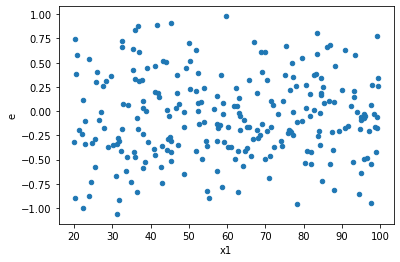

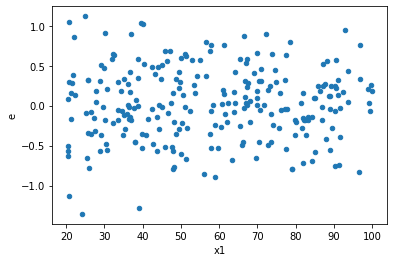

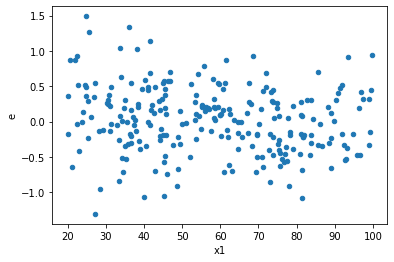

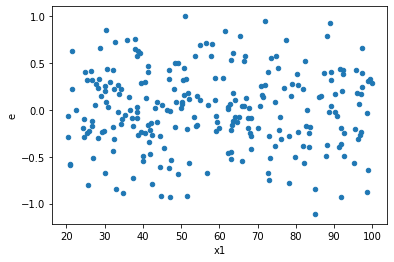

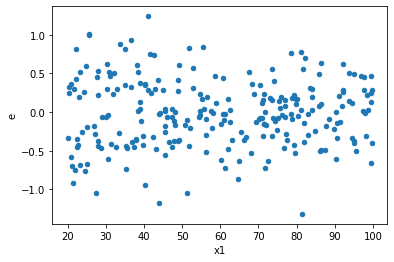

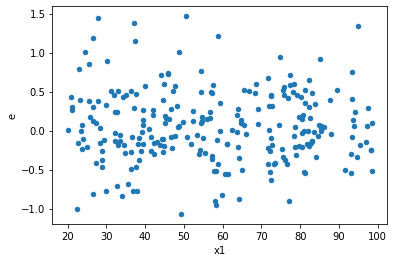

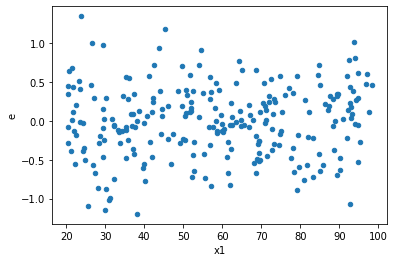

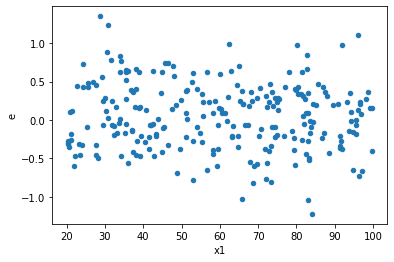

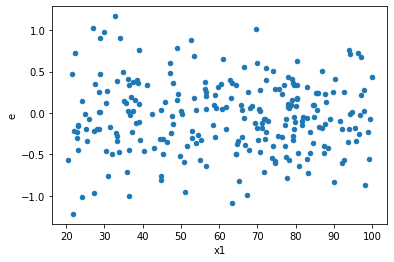

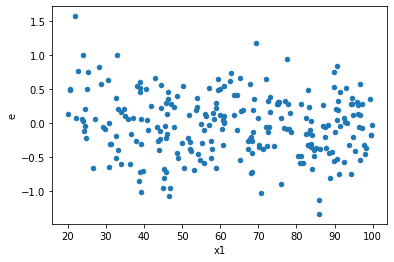

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,99.0,99.0,16.905383587045332,17.971342845877203,0.17076145037419527,0.18152871561492123,1.0630544260260808,0.7615787771675633,0.6192106114162184,0.38078938858378164,Reject001=1 : Homoscedasticity
40.0,99.0,99.0,20.339511046150907,20.613666736790883,0.20544960652677685,0.20821885592718065,1.0134789715454766,0.9470268166547573,0.5264865916726214,0.47351340832737865,Reject001=1 : Homoscedasticity
48.0,99.0,99.0,21.259169601506514,23.6179632769649,0.21473908688390417,0.2385652856259081,1.1109541774054634,0.6016570952894733,0.6991714523552633,0.30082854764473665,Reject001=1 : Homoscedasticity
63.0,99.0,99.0,19.039016494457652,19.73449787353755,0.19231329792381466,0.19933836235896515,1.0365292702636377,0.858695221486198,0.570652389256901,0.429347610743099,Reject001=1 : Homoscedasticity
76.0,99.0,99.0,16.32015509469226,18.337495421759915,0.164850051461538,0.18522722648242337,1.123610364936038,0.5631366740483958,0.7184316629758021,0.2815683370241979,Reject001=1 : Homoscedasticity
109.0,99.0,99.0,20.858508983628333,21.334685638028706,0.21069200993563972,0.2155018751316031,1.02282889226522,0.9108147318268465,0.5445926340865768,0.45540736591342323,Reject001=1 : Homoscedasticity
123.0,99.0,99.0,18.595458842494693,20.733597140523585,0.1878329176009565,0.20943027414670287,1.1149817445290877,0.5892219072363738,0.7053890463818131,0.2946109536181869,Reject001=1 : Homoscedasticity
147.0,99.0,99.0,18.62696590419911,18.896171266105494,0.18815117074948595,0.1908704168293484,1.0144524536787656,0.9432345264139641,0.528382736793018,0.47161726320698205,Reject001=1 : Homoscedasticity
165.0,99.0,99.0,19.80917112790381,22.310377462358076,0.20009263765559404,0.22535734810462704,1.126265067745868,0.5552648970352669,0.7223675514823665,0.27763244851763347,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,22.171761197252444,15.695280601392565,0.22395718381063073,0.15853818789285418,0.7078950770648542,0.08725086277557177,Reject001=1 : Homoscedasticity
1.0,99.0,99.0,25.10618839601224,15.98369183395439,0.2535978625859822,0.16145143266620596,0.6366435072435437,0.025657428799162385,Reject001=1 : Homoscedasticity
2.0,99.0,99.0,27.39361353590432,16.93325882172463,0.27670316702933656,0.17104301840125888,0.6181462259270947,0.017514327530876093,Reject001=1 : Homoscedasticity
3.0,99.0,99.0,16.905383587045332,17.971342845877203,0.17076145037419527,0.18152871561492123,1.0630544260260808,0.7615787771675633,Reject001=1 : Homoscedasticity
4.0,99.0,99.0,25.267761374151306,12.832148409055632,0.2552299128702152,0.12961766069753164,0.5078466675003036,0.0008649761100055316,Reject001=0 : Heteroscedasticity
5.0,99.0,99.0,22.84538458702509,15.984170147119077,0.23076146047500093,0.1614562641123139,0.699667369845776,0.07711868970822697,Reject001=1 : Homoscedasticity
6.0,99.0,99.0,24.509418234690422,17.567716133453693,0.2475698811584891,0.17745167811569387,0.7167740974197624,0.09921631574086467,Reject001=1 : Homoscedasticity
7.0,99.0,99.0,18.881291676886736,18.050875255629922,0.19072011794835086,0.18233207328919113,0.9560190883405845,0.8233907265587074,Reject001=1 : Homoscedasticity
8.0,99.0,99.0,23.320439887337375,13.862011672527643,0.2355599988619937,0.14002031992452166,0.5944146739725306,0.010257402207445846,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      785
Reject001=0 : Heteroscedasticity    215
Name: Result_test, dtype: int64